In [1]:
## uncomment these if you upload this on google drive and mount the drive
# from google.colab import drive
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# drive.mount('/content/gdrive', force_remount=True)

#### Q1. Loading Data

Run the below cell to load CIFAR-10 train and test data.
Answer the corresponding questions in the overleaf document

In [2]:
## Define transforms to apply on images
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

## defining training and test data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

\
## creating data loaders
batch_size = 4 ## set the batch size value
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

## image labels in cifar 10
class_labels = classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 44684559.42it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Helper function
To display images in the training set

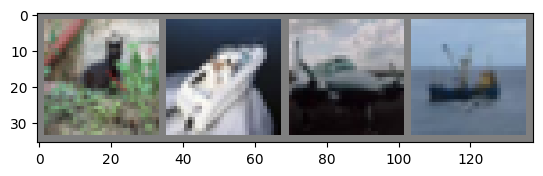

  cat  ship plane  ship


In [3]:
# function to display images in the training set
def display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


## displaying images in 1 batch of the training set

# get 1 batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
display(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%5s' % class_labels[labels[j]] for j in range(4)))


### Q2. Classifier Architecture

In [4]:
## Defining Classifier architecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Q3. Training the network

(i) Training on CPU

In [5]:
### Complete the code in the training box

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

net = Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)



num_epochs = 3
running_loss_list = [] # list to store running loss in the code below
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #===============================================#
        # Fill in the training loop here.
        #===============================================#

        optimizer.zero_grad()
        outputs = net(inputs.cuda())
        loss = criterion(outputs, labels.cuda())
        loss.backward()
        optimizer.step()
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0

print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

## complete the code to plot the running loss per 250 mini batches curve

def plot_loss_curve(running_loss_list):
    ## complete code
    plt.plot(running_loss_list)
    plt.xlabel('Mini Batch')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.show()
plot_loss_curve

[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.203
[1, 1750] loss: 2.095
[1, 2000] loss: 2.037
[1, 2250] loss: 1.984
[1, 2500] loss: 1.948
[1, 2750] loss: 1.951
[1, 3000] loss: 1.860
[1, 3250] loss: 1.842
[1, 3500] loss: 1.788
[1, 3750] loss: 1.749
[1, 4000] loss: 1.759
[1, 4250] loss: 1.712
[1, 4500] loss: 1.718
[1, 4750] loss: 1.691
[1, 5000] loss: 1.681
[1, 5250] loss: 1.634
[1, 5500] loss: 1.668
[1, 5750] loss: 1.697
[1, 6000] loss: 1.648
[1, 6250] loss: 1.573
[1, 6500] loss: 1.604
[1, 6750] loss: 1.550
[1, 7000] loss: 1.561
[1, 7250] loss: 1.521
[1, 7500] loss: 1.527
[1, 7750] loss: 1.534
[1, 8000] loss: 1.512
[1, 8250] loss: 1.538
[1, 8500] loss: 1.490
[1, 8750] loss: 1.493
[1, 9000] loss: 1.532
[1, 9250] loss: 1.506
[1, 9500] loss: 1.474
[1, 9750] loss: 1.477
[1, 10000] loss: 1.409
[1, 10250] loss: 1.471
[1, 10500] loss: 1.461
[1, 10750] loss: 1.433
[1, 11000] loss: 1.422
[1, 11250] loss: 1.465
[1, 115

<function __main__.plot_loss_curve(running_loss_list)>

[575.9426784515381, 574.9145486354828, 574.477303981781, 572.5861060619354, 566.8765780925751, 550.7392921447754, 523.676367521286, 509.2552273273468, 496.07709288597107, 487.0847477912903, 487.6734608411789, 465.06269657611847, 460.5263193845749, 446.92022383213043, 437.27167642116547, 439.8478503227234, 427.9621824026108, 429.3879623413086, 422.8744004368782, 420.20217168331146, 408.45006960630417, 417.10811507701874, 424.21419137716293, 411.99886453151703, 393.19971761107445, 400.88916015625, 387.4152858555317, 390.30257219076157, 380.3558091968298, 381.83937072753906, 383.597684442997, 378.0983758568764, 384.4962408840656, 372.4111567735672, 373.3185179233551, 383.0832875967026, 376.53929087519646, 368.5308955311775, 369.12563982605934, 352.1565980911255, 367.6573314666748, 365.18990433216095, 358.2076831459999, 355.57538209855556, 366.3064443767071, 346.2289213836193, 361.97862726449966, 349.25835117697716, 355.57682536542416, 369.5158163905144, 344.8566963970661, 354.936936795711

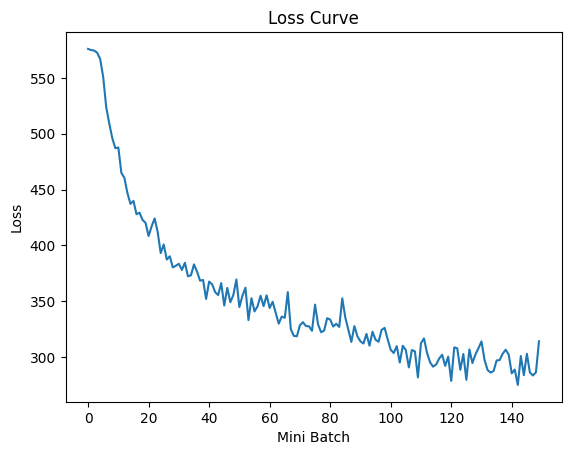

In [7]:
print(running_loss_list)

plot_loss_curve(running_loss_list)


(ii) Paste the above code in the code block below and modify it to use GPUs for training


[1, 250] loss: 2.303
[1, 500] loss: 2.303
[1, 750] loss: 2.298
[1, 1000] loss: 2.294
[1, 1250] loss: 2.269
[1, 1500] loss: 2.204
[1, 1750] loss: 2.132
[1, 2000] loss: 2.079
[1, 2250] loss: 2.029
[1, 2500] loss: 2.016
[1, 2750] loss: 2.007
[1, 3000] loss: 1.939
[1, 3250] loss: 1.867
[1, 3500] loss: 1.932
[1, 3750] loss: 1.898
[1, 4000] loss: 1.898
[1, 4250] loss: 1.857
[1, 4500] loss: 1.795
[1, 4750] loss: 1.798
[1, 5000] loss: 1.741
[1, 5250] loss: 1.731
[1, 5500] loss: 1.693
[1, 5750] loss: 1.662
[1, 6000] loss: 1.673
[1, 6250] loss: 1.639
[1, 6500] loss: 1.669
[1, 6750] loss: 1.637
[1, 7000] loss: 1.612
[1, 7250] loss: 1.592
[1, 7500] loss: 1.609
[1, 7750] loss: 1.576
[1, 8000] loss: 1.554
[1, 8250] loss: 1.626
[1, 8500] loss: 1.561
[1, 8750] loss: 1.538
[1, 9000] loss: 1.551
[1, 9250] loss: 1.540
[1, 9500] loss: 1.568
[1, 9750] loss: 1.498
[1, 10000] loss: 1.496
[1, 10250] loss: 1.495
[1, 10500] loss: 1.503
[1, 10750] loss: 1.489
[1, 11000] loss: 1.489
[1, 11250] loss: 1.451
[1, 115

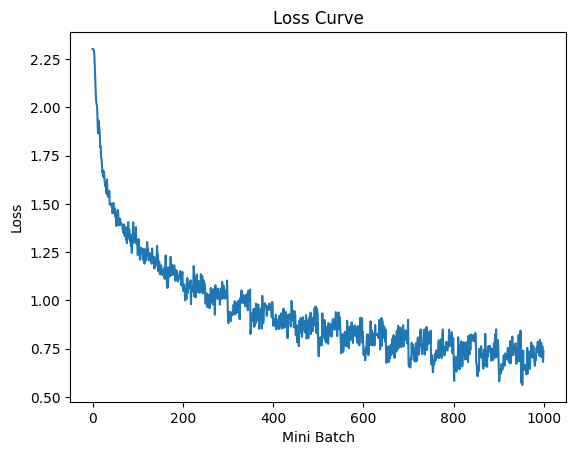

In [8]:
### Copy the code from (i), and modify it to run on GPUs for 20 epochs

net = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 20
running_loss_list = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 250 == 249:
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss / 250)
            running_loss = 0.0

print('Training Complete')

PATH = './net.pth'
torch.save(net.state_dict(), PATH)

# Plotting the loss curve
import matplotlib.pyplot as plt

def plot_loss_curve(running_loss_list):
    plt.plot(running_loss_list)
    plt.xlabel('Mini Batch')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.show()

plot_loss_curve(running_loss_list)


### Testing the network

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Display images
imshow(torchvision.utils.make_grid(images[0:4]))

# Print ground truth and predicted labels
print('GroundTruth: ', ' '.join('%5s' % class_labels[labels[j]] for j in range(4)))
print('Predicted: ', ' '.join('%5s' % class_labels[predicted[j]] for j in range(4)))


tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  1.0000,  ...,  0.1451,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.1294,  ...,  0.3412,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  1.0000,  ...,  0.4353,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.1451,  ...,  0.0431,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0

GroundTruth:  horse truck horse   cat
Predicted:  truck   cat horse  deer


(iv) Complete the code below to test the network on the entire testing set.

In [23]:

### Accuracy on whole data set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc  =  100 * correct / total ## stores the accuracy computed in the above loop
print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Accuracy of the network on the 10000 test images: 61 %


(v) Convert the training code in part (iii) and testing code in part (iv) to define functions `train` and  `test` with function definitions as shown below. Train the network with different batch size and number of epochs. Use the `plot_loss_curve` function you defined in (i) above to plot the loss curves. Use the defined `train` and `test` functions to train the network for various configurations asked in (v) in the problem set.

Files already downloaded and verified
Files already downloaded and verified
[1, 500] loss: 2.302
[1, 1000] loss: 2.280
[1, 1500] loss: 2.152
[1, 2000] loss: 2.048
[1, 2500] loss: 1.962
[1, 3000] loss: 1.883
[1, 3500] loss: 1.840
[1, 4000] loss: 1.755
[1, 4500] loss: 1.693
[1, 5000] loss: 1.687
[1, 5500] loss: 1.628
[1, 6000] loss: 1.642
[1, 6500] loss: 1.619
[1, 7000] loss: 1.549
[1, 7500] loss: 1.586
[1, 8000] loss: 1.532
[1, 8500] loss: 1.583
[1, 9000] loss: 1.544
[1, 9500] loss: 1.505
[1, 10000] loss: 1.512
[1, 10500] loss: 1.521
[1, 11000] loss: 1.439
[1, 11500] loss: 1.457
[1, 12000] loss: 1.482
[1, 12500] loss: 1.464
[2, 500] loss: 1.388
[2, 1000] loss: 1.423
[2, 1500] loss: 1.387
[2, 2000] loss: 1.430
[2, 2500] loss: 1.428
[2, 3000] loss: 1.416
[2, 3500] loss: 1.405
[2, 4000] loss: 1.359
[2, 4500] loss: 1.333
[2, 5000] loss: 1.412
[2, 5500] loss: 1.365
[2, 6000] loss: 1.374
[2, 6500] loss: 1.323
[2, 7000] loss: 1.340
[2, 7500] loss: 1.364
[2, 8000] loss: 1.343
[2, 8500] loss: 1.

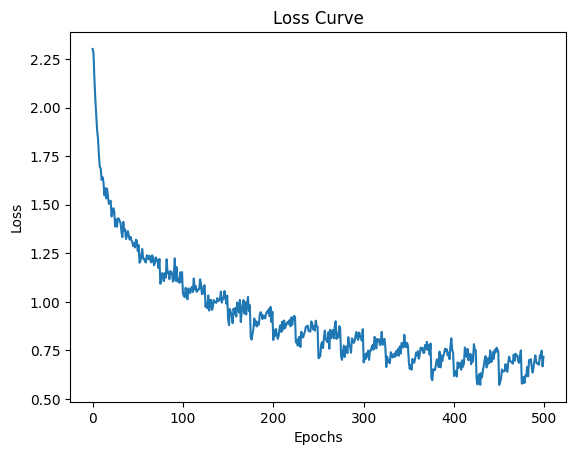

Accuracy of the network on the 10000 test images: 60 %
[1, 500] loss: 2.307
[1, 1000] loss: 2.304
[1, 1500] loss: 2.304
[1, 2000] loss: 2.305
[1, 2500] loss: 2.307
[1, 3000] loss: 2.306
[1, 3500] loss: 2.305
[1, 4000] loss: 2.307
[1, 4500] loss: 2.309
[1, 5000] loss: 2.304
[1, 5500] loss: 2.305
[1, 6000] loss: 2.303
[1, 6500] loss: 2.304
[1, 7000] loss: 2.305
[1, 7500] loss: 2.305
[1, 8000] loss: 2.306
[1, 8500] loss: 2.306
[1, 9000] loss: 2.305
[1, 9500] loss: 2.306
[1, 10000] loss: 2.303
[1, 10500] loss: 2.307
[1, 11000] loss: 2.304
[1, 11500] loss: 2.306
[1, 12000] loss: 2.304
[1, 12500] loss: 2.305
[2, 500] loss: 2.306
[2, 1000] loss: 2.307
[2, 1500] loss: 2.306
[2, 2000] loss: 2.303
[2, 2500] loss: 2.303
[2, 3000] loss: 2.303
[2, 3500] loss: 2.306
[2, 4000] loss: 2.308
[2, 4500] loss: 2.304
[2, 5000] loss: 2.306
[2, 5500] loss: 2.305
[2, 6000] loss: 2.306
[2, 6500] loss: 2.304
[2, 7000] loss: 2.306
[2, 7500] loss: 2.303
[2, 8000] loss: 2.307
[2, 8500] loss: 2.307
[2, 9000] loss: 2

KeyboardInterrupt: 

In [26]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch
import matplotlib.pyplot as plt

# Assuming you have defined your dataset (train_data and test_data)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

def get_data_loader(batch_size, train=True):
    dataset = train_data if train else test_data
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)


def train(train_loader, net, criterion, optimizer, num_epochs=5, use_gpu=False, lr=0.001, momentum=0.9, model_save_path='./net.pth'):
    """
    The `batch_size` parameter is removed from this function since the batch size is already defined by the DataLoader.
    """
    if use_gpu and torch.cuda.is_available():
        net = net.cuda()

    running_loss_list = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            if use_gpu and torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 500 == 499:  # Print every 2000 mini-batches
                print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 500))
                running_loss_list.append(running_loss / 500)
                running_loss = 0.0

    torch.save(net.state_dict(), model_save_path)

    return running_loss_list

def test(test_loader, net, model_path='./net.pth', use_gpu=False):
    net.load_state_dict(torch.load(model_path))
    if use_gpu and torch.cuda.is_available():
        net = net.cuda()

    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            if use_gpu and torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

def plot_loss_curve(running_loss_list):
    plt.plot(running_loss_list)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.show()

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

batch_size_4_loader = get_data_loader(batch_size=4, train=True)
batch_size_16_loader = get_data_loader(batch_size=16, train=True)
test_loader = get_data_loader(batch_size=4, train=False)


#training Batch Size 4, 20 training epochs

running_loss_list = train(batch_size_4_loader, net, criterion, optimizer, num_epochs=20, use_gpu=True, model_save_path='./net.pth')
plot_loss_curve(running_loss_list)
test(test_loader, net, model_path='./net.pth', use_gpu=True)



#Training Batch Size 4, 5 epochs
net = Net()

running_loss_list = train(batch_size_4_loader, net, criterion, optimizer, num_epochs=5, use_gpu=True, model_save_path='./net.pth')
plot_loss_curve(running_loss_list)
test(test_loader, net, model_path='./net.pth', use_gpu=True)




#Training Batch Size 16, 5 epochs
net = Net()
running_loss_list = train(batch_size_16_loader, net, criterion, optimizer, num_epochs=5, use_gpu=True, model_save_path='./net.pth', batch_size=16)
plot_loss_curve(running_loss_list)
test(test_loader, net, model_path='./net.pth', use_gpu=True)




#Training Batch Size 16, 20 epoch
net = Net()
running_loss_list = train(batch_size_16_loader, net, criterion, optimizer, num_epochs=20, use_gpu=True, model_save_path='./net.pth', batch_size=16)
plot_loss_curve(running_loss_list)
test(test_loader, net, model_path='./net.pth', use_gpu=True)





[1, 500] loss: 2.286
[1, 1000] loss: 2.186
[1, 1500] loss: 2.079
[1, 2000] loss: 1.995
[1, 2500] loss: 1.959
[1, 3000] loss: 1.848
[1, 3500] loss: 1.806
[1, 4000] loss: 1.759
[1, 4500] loss: 1.702
[1, 5000] loss: 1.651
[1, 5500] loss: 1.654
[1, 6000] loss: 1.672
[1, 6500] loss: 1.635
[1, 7000] loss: 1.621
[1, 7500] loss: 1.558
[1, 8000] loss: 1.535
[1, 8500] loss: 1.562
[1, 9000] loss: 1.543
[1, 9500] loss: 1.492
[1, 10000] loss: 1.531
[1, 10500] loss: 1.493
[1, 11000] loss: 1.476
[1, 11500] loss: 1.484
[1, 12000] loss: 1.470
[1, 12500] loss: 1.463
[2, 500] loss: 1.426
[2, 1000] loss: 1.441
[2, 1500] loss: 1.406
[2, 2000] loss: 1.404
[2, 2500] loss: 1.409
[2, 3000] loss: 1.390
[2, 3500] loss: 1.380
[2, 4000] loss: 1.385
[2, 4500] loss: 1.365
[2, 5000] loss: 1.394
[2, 5500] loss: 1.311
[2, 6000] loss: 1.350
[2, 6500] loss: 1.298
[2, 7000] loss: 1.308
[2, 7500] loss: 1.338
[2, 8000] loss: 1.326
[2, 8500] loss: 1.343
[2, 9000] loss: 1.285
[2, 9500] loss: 1.347
[2, 10000] loss: 1.315
[2, 1

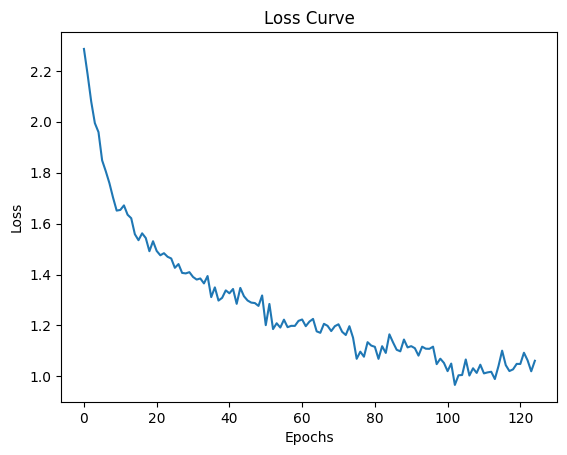

Accuracy of the network on the 10000 test images: 61 %


In [30]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

batch_size_4_loader = get_data_loader(batch_size=4, train=True)
batch_size_16_loader = get_data_loader(batch_size=16, train=True)
test_loader = get_data_loader(batch_size=4, train=False)


#training Batch Size 4, 5 training epochs

running_loss_list = train(batch_size_4_loader, net, criterion, optimizer, num_epochs=5, use_gpu=True, model_save_path='./net.pth')
plot_loss_curve(running_loss_list)
test(test_loader, net, model_path='./net.pth', use_gpu=True)


[1, 500] loss: 2.302
[1, 1000] loss: 2.296
[1, 1500] loss: 2.239
[1, 2000] loss: 2.047
[1, 2500] loss: 1.950
[1, 3000] loss: 1.827
[2, 500] loss: 1.727
[2, 1000] loss: 1.667
[2, 1500] loss: 1.620
[2, 2000] loss: 1.569
[2, 2500] loss: 1.536
[2, 3000] loss: 1.525
[3, 500] loss: 1.482
[3, 1000] loss: 1.467
[3, 1500] loss: 1.446
[3, 2000] loss: 1.420
[3, 2500] loss: 1.403
[3, 3000] loss: 1.388
[4, 500] loss: 1.358
[4, 1000] loss: 1.334
[4, 1500] loss: 1.329
[4, 2000] loss: 1.314
[4, 2500] loss: 1.305
[4, 3000] loss: 1.301
[5, 500] loss: 1.265
[5, 1000] loss: 1.266
[5, 1500] loss: 1.225
[5, 2000] loss: 1.205
[5, 2500] loss: 1.231
[5, 3000] loss: 1.204


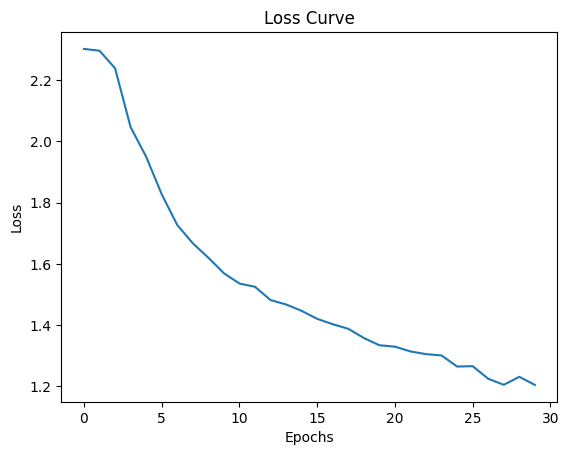

Accuracy of the network on the 10000 test images: 56 %


In [31]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

batch_size_4_loader = get_data_loader(batch_size=4, train=True)
batch_size_16_loader = get_data_loader(batch_size=16, train=True)
test_loader = get_data_loader(batch_size=4, train=False)


#training Batch Size 16, 5 training epochs

running_loss_list = train(batch_size_16_loader, net, criterion, optimizer, num_epochs=5, use_gpu=True, model_save_path='./net.pth')
plot_loss_curve(running_loss_list)
test(test_loader, net, model_path='./net.pth', use_gpu=True)


[1, 500] loss: 2.303
[1, 1000] loss: 2.294
[1, 1500] loss: 2.186
[1, 2000] loss: 1.972
[1, 2500] loss: 1.866
[1, 3000] loss: 1.758
[2, 500] loss: 1.628
[2, 1000] loss: 1.598
[2, 1500] loss: 1.558
[2, 2000] loss: 1.531
[2, 2500] loss: 1.496
[2, 3000] loss: 1.456
[3, 500] loss: 1.421
[3, 1000] loss: 1.397
[3, 1500] loss: 1.403
[3, 2000] loss: 1.350
[3, 2500] loss: 1.350
[3, 3000] loss: 1.343
[4, 500] loss: 1.310
[4, 1000] loss: 1.267
[4, 1500] loss: 1.261
[4, 2000] loss: 1.278
[4, 2500] loss: 1.244
[4, 3000] loss: 1.236
[5, 500] loss: 1.201
[5, 1000] loss: 1.211
[5, 1500] loss: 1.183
[5, 2000] loss: 1.170
[5, 2500] loss: 1.185
[5, 3000] loss: 1.152
[6, 500] loss: 1.136
[6, 1000] loss: 1.136
[6, 1500] loss: 1.120
[6, 2000] loss: 1.113
[6, 2500] loss: 1.124
[6, 3000] loss: 1.096
[7, 500] loss: 1.067
[7, 1000] loss: 1.084
[7, 1500] loss: 1.070
[7, 2000] loss: 1.088
[7, 2500] loss: 1.055
[7, 3000] loss: 1.055
[8, 500] loss: 1.021
[8, 1000] loss: 0.996
[8, 1500] loss: 1.016
[8, 2000] loss: 1.

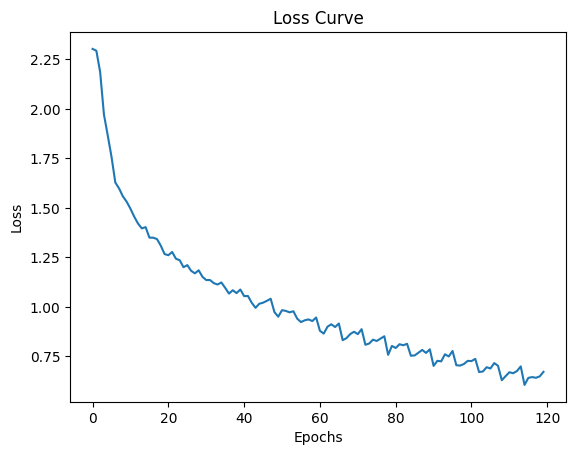

Accuracy of the network on the 10000 test images: 65 %


In [32]:
net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

batch_size_4_loader = get_data_loader(batch_size=4, train=True)
batch_size_16_loader = get_data_loader(batch_size=16, train=True)
test_loader = get_data_loader(batch_size=4, train=False)


#training Batch Size 16, 20 training epochs

running_loss_list = train(batch_size_16_loader, net, criterion, optimizer, num_epochs=20, use_gpu=True, model_save_path='./net.pth')
plot_loss_curve(running_loss_list)
test(test_loader, net, model_path='./net.pth', use_gpu=True)
